In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visualization
plt.style.use('seaborn-v0_8')


In [4]:
# Load the population data
population_data = pd.read_csv('data/PRODIGY_DS_01-main/API_SP.POP.TOTL_DS2_en_csv_v2_26346.csv', skiprows=3)
metadata = pd.read_csv('data/PRODIGY_DS_01-main/Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_26346.csv')

# Display first few rows of the data
print('Population Data Preview:')
display(population_data.head())
print('Metadata Preview:')
display(metadata.head())


Population Data Preview:


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,107906.0,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130072080.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,607123269.0,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,33831764.0,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,418127845.0,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,28157798.0,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,NaN


Metadata Preview:


,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


In [6]:
# Process the data
# Get the latest year's population data (2023)
latest_population = population_data[['Country Name', '2023']].copy()
latest_population.columns = ['Country', 'Population']

# Merge with metadata to get region information
merged_data = latest_population.merge(metadata[['TableName', 'Region']], 
                                    left_on='Country', 
                                    right_on='TableName', 
                                    how='inner')

# Remove rows where Region is empty and drop duplicates
merged_data = merged_data.dropna(subset=['Region']).drop_duplicates(subset=['Country'])

# Display the processed data
print('Processed Data Preview:')
display(merged_data.head())


Processed Data Preview:


,Country,Population,TableName,Region
0,Aruba,107359.0,Aruba,Latin America & Caribbean
2,Afghanistan,41454761.0,Afghanistan,South Asia
4,Angola,36749906.0,Angola,Sub-Saharan Africa
5,Albania,2745972.0,Albania,Europe & Central Asia
6,Andorra,80856.0,Andorra,Europe & Central Asia


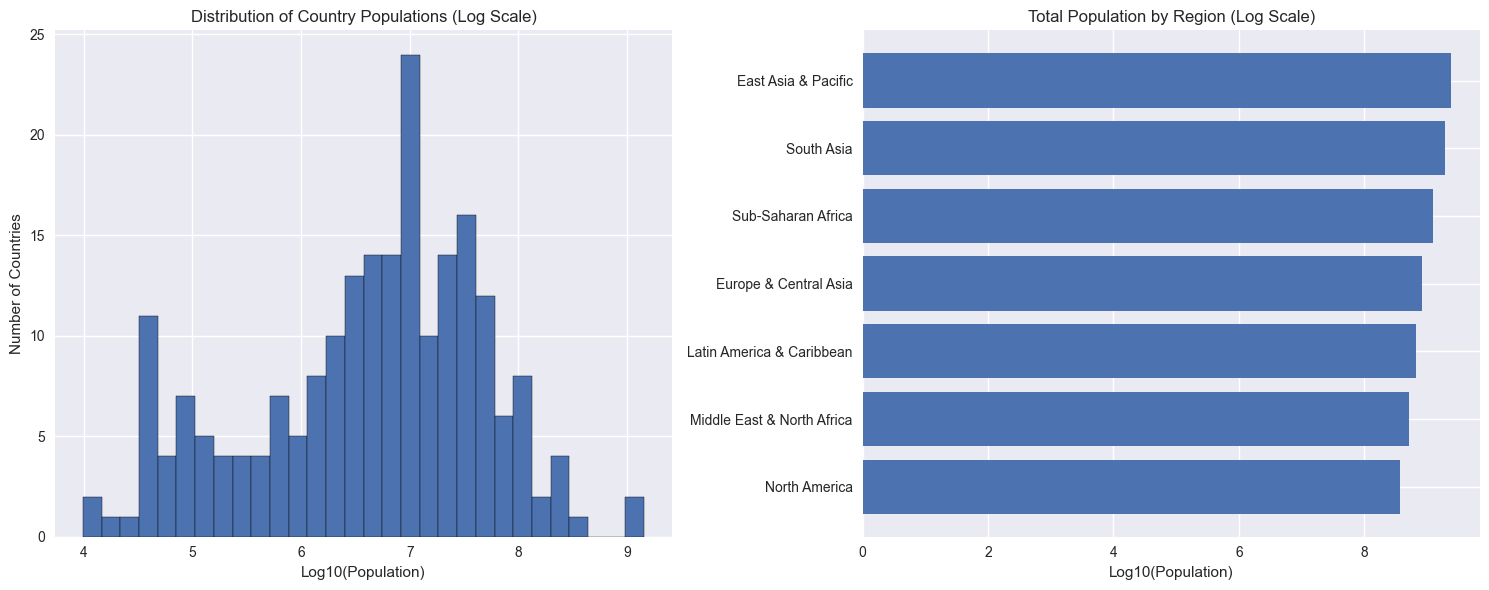

In [8]:
# Create visualizations
plt.figure(figsize=(15, 6))

# Plot 1: Distribution of Population by Country
plt.subplot(1, 2, 1)
plt.hist(np.log10(merged_data['Population']), bins=30, edgecolor='black')
plt.title('Distribution of Country Populations (Log Scale)')
plt.xlabel('Log10(Population)')
plt.ylabel('Number of Countries')

# Plot 2: Population by Region
plt.subplot(1, 2, 2)
region_population = merged_data.groupby('Region')['Population'].sum().sort_values(ascending=True)
plt.barh(region_population.index, np.log10(region_population.values))
plt.title('Total Population by Region (Log Scale)')
plt.xlabel('Log10(Population)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()
